In [1]:
%matplotlib notebook

In this example, we are going to query any thing that have been observed with a seeing lower than 2arcsec between the 1st of May 2018 and the 1st of June 2018.

In [7]:
# Julian dates:
from astropy import time
starts = time.Time("2018-05-01").jd # 2458239.5
ends = time.Time("2019-08-01").jd # 2458270.5
ends2 = time.Time("2019-12-01").jd # 2458270.5
print(jd_1may18,jd_1june18)

2458239.5 2458270.5


In [8]:
from ztfquery import query
zquery = query.ZTFQuery()


# Do the Query to see what exists
zquery.load_metadata(sql_query="ccdid<11 and obsjd BETWEEN %d AND %d"%(starts, ends))

In [9]:
zquery._data

<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
0                                       <html><head>
1                     <title>502 Proxy Error</title>
2                                      </head><body>
3                               <h1>Proxy Error</h1>
4            <p>The proxy server received an invalid
5            response from an upstream server.<br />
6  The proxy server could not handle the request ...
7  Reason: <strong>Error reading from remote serv...
8                                     </body></html>

<IPython.core.display.Javascript object>


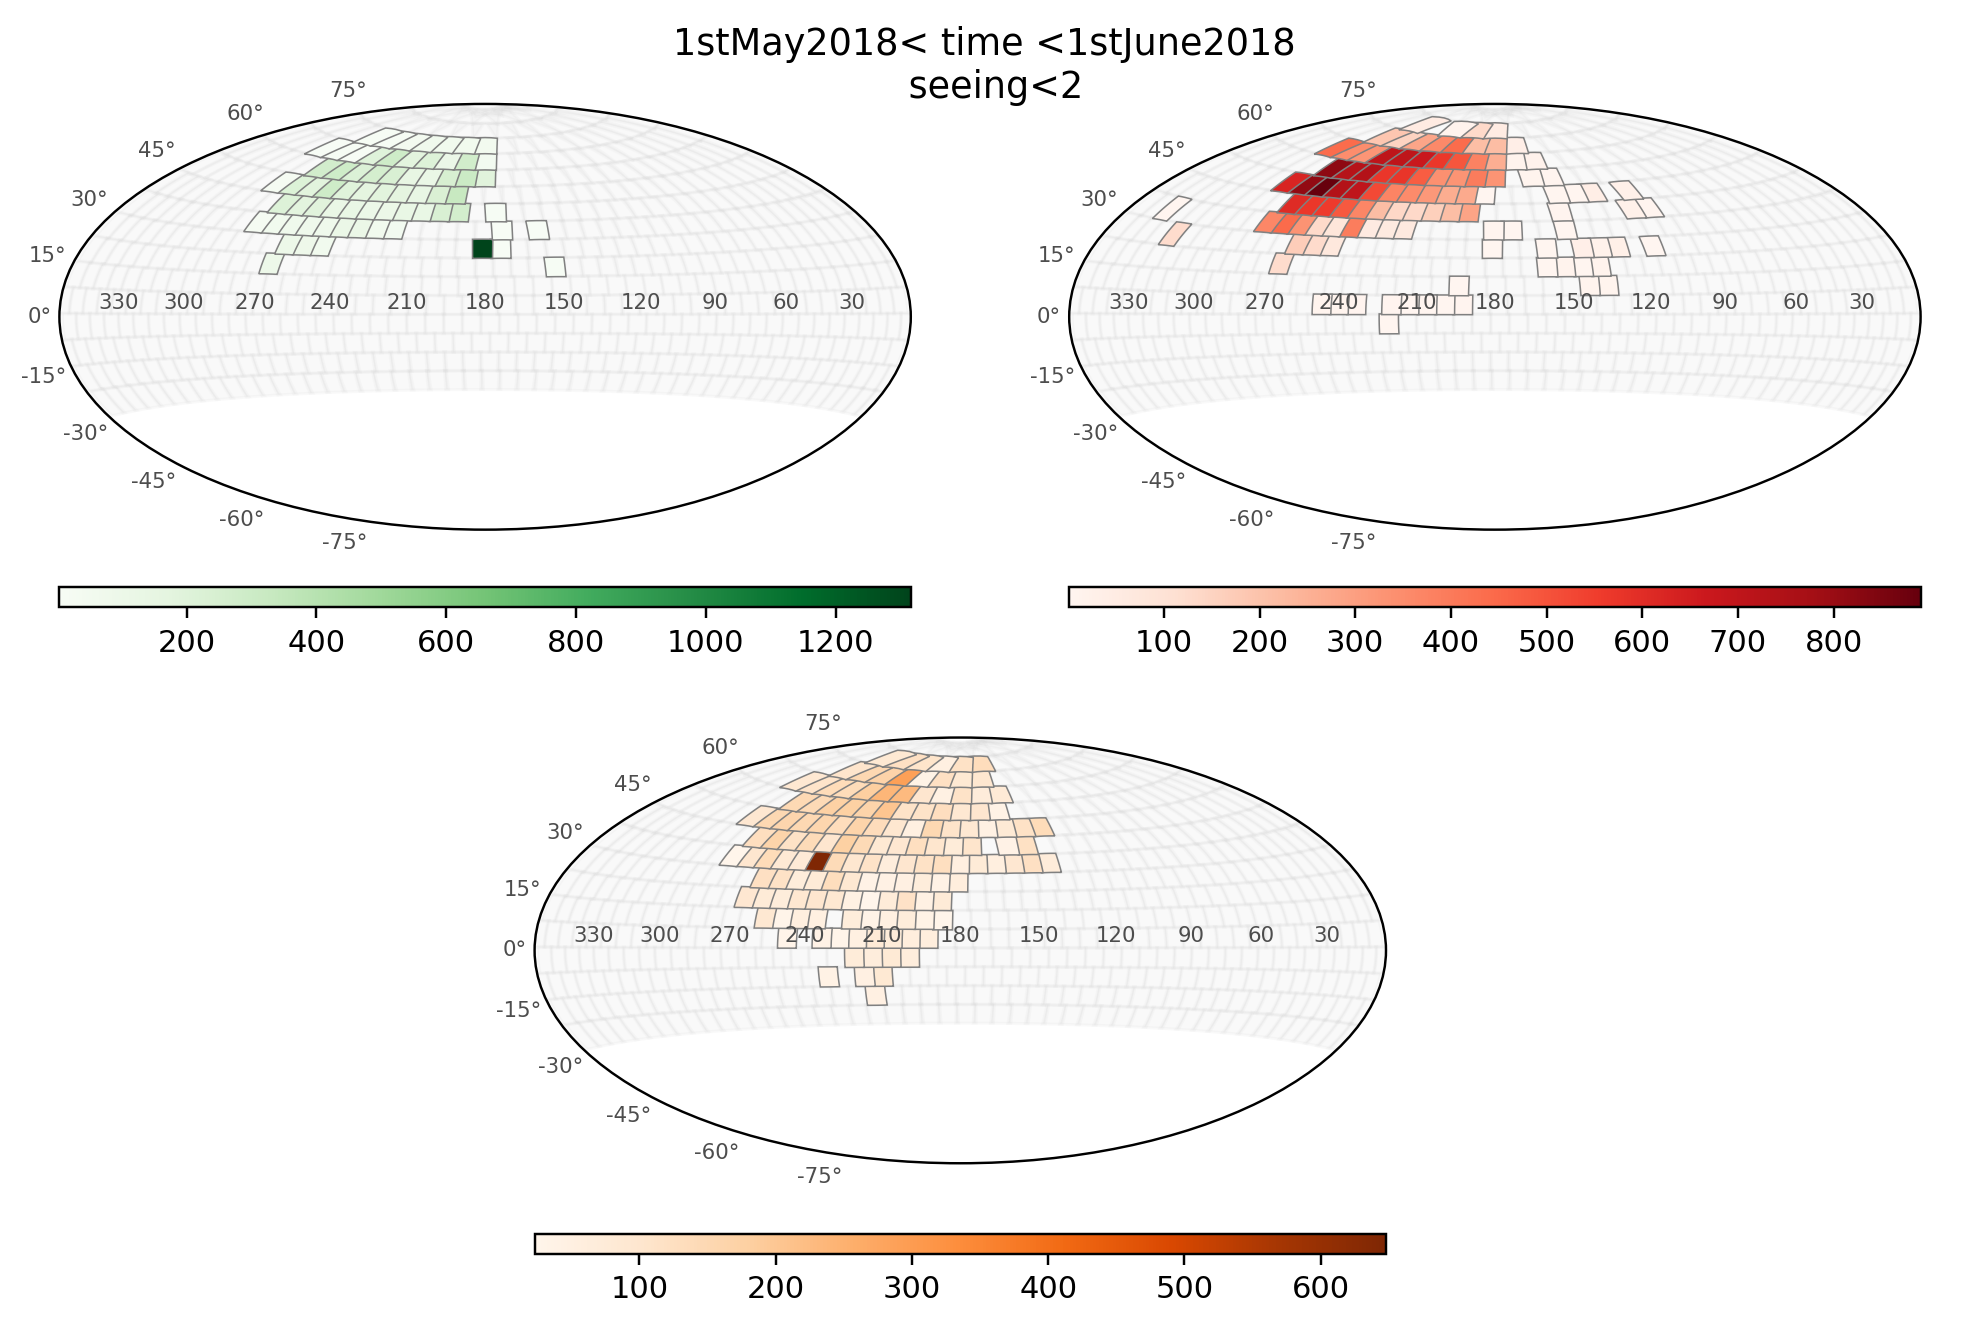

In [7]:
fig = zquery.show_gri_fields(title="1stMay2018< time <1stJune2018 \n seeing<2", grid="main")

In [8]:
fig.savefig("/Users/mrigault/Libraries/ztfquery/examples/figures/seeing_lower2_inMay.png", dpi=250)

# Average `value` using a field

`value` could be anything within the data DataFrame (metatable or data depending on your object see `_data`)

### Case of Airmass

<IPython.core.display.Javascript object>


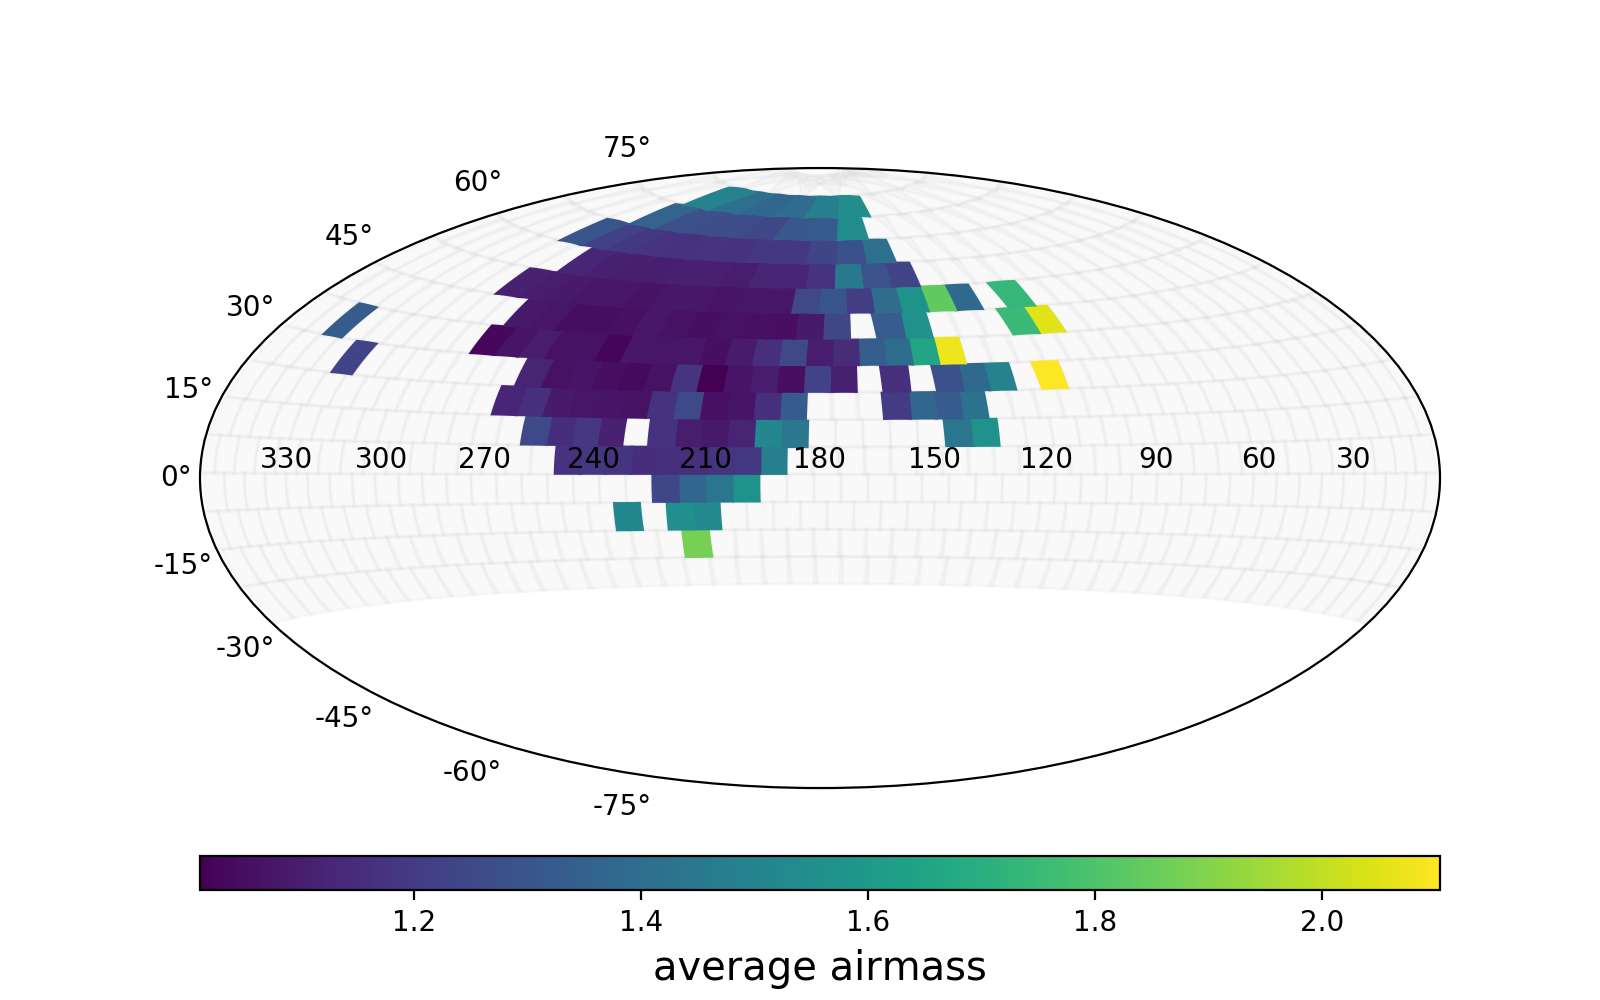

In [10]:
field_airmass = zquery.get_field_average_value("airmass", grid="main")

zquery.show_fields(field_airmass, clabel="average airmass")

### Case of RA

<IPython.core.display.Javascript object>


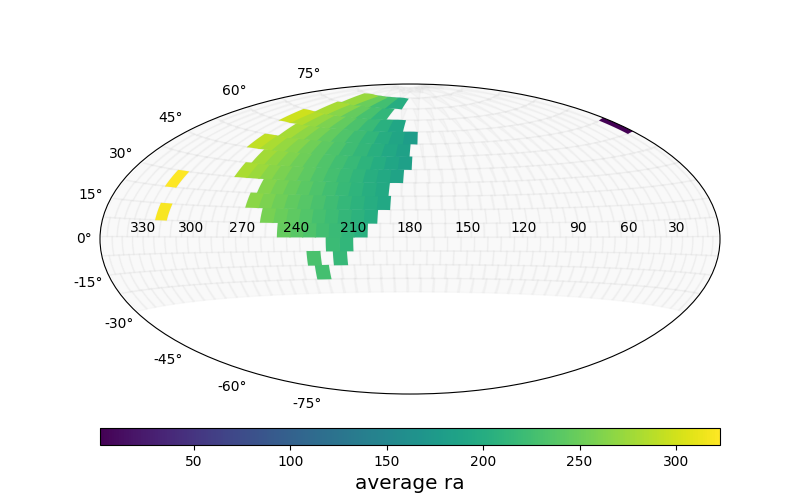

In [8]:
field_airmass = zquery.get_field_average_value("ra", grid="main")

zquery.show_fields(field_airmass, clabel="average ra")

In [9]:
# list of value in this object
zquery.metatable.columns

Index(['ra', 'dec', 'infobits', 'field', 'ccdid', 'qid', 'rcid', 'fid',
       'filtercode', 'pid', 'nid', 'expid', 'itid', 'imgtype', 'imgtypecode',
       'obsdate', 'obsjd', 'exptime', 'filefracday', 'seeing', 'airmass',
       'moonillf', 'moonesb', 'maglimit', 'crpix1', 'crpix2', 'crval1',
       'crval2', 'cd11', 'cd12', 'cd21', 'cd22', 'ra1', 'dec1', 'ra2', 'dec2',
       'ra3', 'dec3', 'ra4', 'dec4', 'ipac_pub_date', 'ipac_gid'],
      dtype='object')

# Any Dictionary you want

<IPython.core.display.Javascript object>


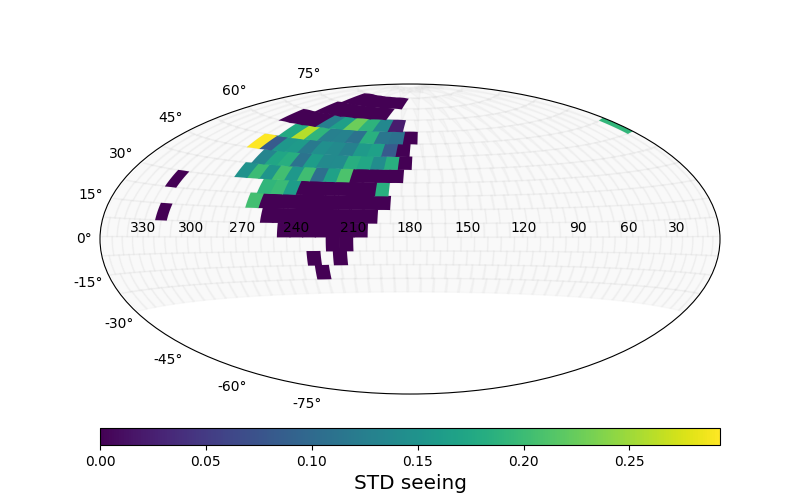

In [10]:
field_std_seeing = {f_: np.nanstd(zquery._data[np.in1d(zquery._data["field"], f_)]["seeing"])
                    for f_ in zquery.get_observed_fields(grid="main")}

zquery.show_fields(field_std_seeing, clabel="STD seeing")

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [ ]:
zquery.download_data("psfcat.fits", show_progress=False)